In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

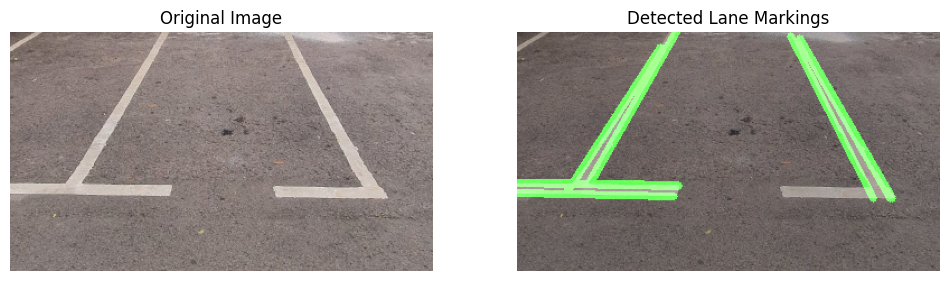

In [48]:
def detect_lane_markings(image):
    # Konversi citra ke dalam ruang warna Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan filter blur untuk mengurangi noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Deteksi tepi menggunakan metode Canny
    edges = cv2.Canny(blurred_image, 50, 150)

    # Lakukan transformasi Hough untuk mendeteksi garis
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

    # Gambar garis-garis pada citra asli
    line_image = np.zeros_like(image)
    draw_lines(line_image, lines)

    # Gabungkan citra asli dengan garis marka jalan
    marked_image = cv2.addWeighted(image, 0.8, line_image, 1.0, 0.0)

    return marked_image

def draw_lines(image, lines, color=(0, 255, 0), thickness=5):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)

# Baca citra input
image = cv2.imread('parkiran.jpg')

# Ubah citra ke dalam ukuran yang lebih kecil untuk meningkatkan performa
image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

# Deteksi garis marka jalan pada citra
result = detect_lane_markings(image)

# Tampilkan citra asli dan citra dengan garis marka jalan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Detected Lane Markings')
plt.axis('off')

plt.show()